In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
from keras.layers import Dense,Activation,Flatten,Convolution2D,Dropout,MaxPooling2D
from keras.utils  import np_utils
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [4]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

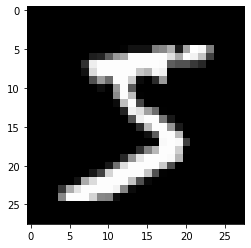

In [6]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

cnn expect that image can be multi channel, but here we have is black and white image

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape,y_test.shape)

(60000, 10) (10000, 10)


In [9]:
X_train = X_train[:3600]
y_train = y_train[:3600]

X_test = X_test[:900]
y_test = y_test[:900]

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3600, 28, 28, 1) (3600, 10)
(900, 28, 28, 1) (900, 10)


In [10]:
model = Sequential()
model.add(Convolution2D(32,3,3,input_shape=(28,28,1)))
model.add(Activation('relu'))


model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16,3,3))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

W0628 22:18:40.621407  4072 deprecation_wrapper.py:119] From c:\users\shivansh khanna\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

c:\users\shivansh khanna\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
W0628 22:18:40.636394  4072 deprecation_wrapper.py:119] From c:\users\shivansh khanna\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 22:18:40.639710  4072 deprecation_wrapper.py:119] From c:\users\shivansh khanna\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 16)        0         
__________

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0628 22:19:00.363052  4072 deprecation_wrapper.py:119] From c:\users\shivansh khanna\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0628 22:19:00.385634  4072 deprecation_wrapper.py:119] From c:\users\shivansh khanna\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs =12,batch_size = 16,verbose=2)

W0628 22:19:10.217689  4072 deprecation.py:323] From c:\users\shivansh khanna\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3600 samples, validate on 900 samples
Epoch 1/12
 - 5s - loss: 1.1242 - acc: 0.6969 - val_loss: 0.2682 - val_acc: 0.9078
Epoch 2/12
 - 5s - loss: 0.2787 - acc: 0.9200 - val_loss: 0.1942 - val_acc: 0.9300
Epoch 3/12
 - 5s - loss: 0.1748 - acc: 0.9469 - val_loss: 0.1391 - val_acc: 0.9522
Epoch 4/12
 - 5s - loss: 0.1091 - acc: 0.9667 - val_loss: 0.1406 - val_acc: 0.9589
Epoch 5/12
 - 5s - loss: 0.1001 - acc: 0.9694 - val_loss: 0.1713 - val_acc: 0.9489
Epoch 6/12
 - 5s - loss: 0.0736 - acc: 0.9767 - val_loss: 0.1555 - val_acc: 0.9489
Epoch 7/12
 - 5s - loss: 0.0798 - acc: 0.9761 - val_loss: 0.1741 - val_acc: 0.9511
Epoch 8/12
 - 5s - loss: 0.0566 - acc: 0.9839 - val_loss: 0.1646 - val_acc: 0.9556
Epoch 9/12
 - 5s - loss: 0.0651 - acc: 0.9803 - val_loss: 0.1288 - val_acc: 0.9578
Epoch 10/12
 - 6s - loss: 0.0521 - acc: 0.9817 - val_loss: 0.2314 - val_acc: 0.9444
Epoch 11/12
 - 5s - loss: 0.0580 - acc: 0.9831 - val_loss: 0.1808 - val_acc: 0.9589
Epoch 12/12
 - 5s - loss: 0.0412 - acc